<a href="https://colab.research.google.com/github/Eric-Chung-0511/Learning-Record/blob/main/General%20Helpers/Examples/Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practice mutli-class classification

In [ ]:
# fashion MNIST
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# The data already been sorted into training and test sets
# train 60000, test 10000
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f'Training Sample:\n{train_data[0]}\n')
print(f'Training Labels:\n{train_labels[0]}\n')

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

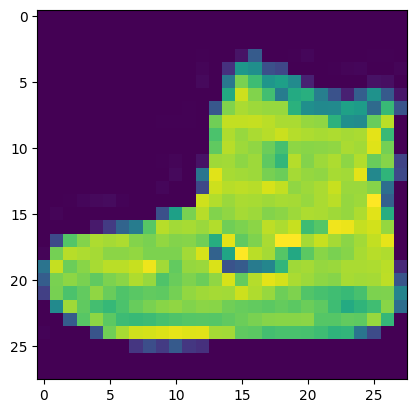

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.show()

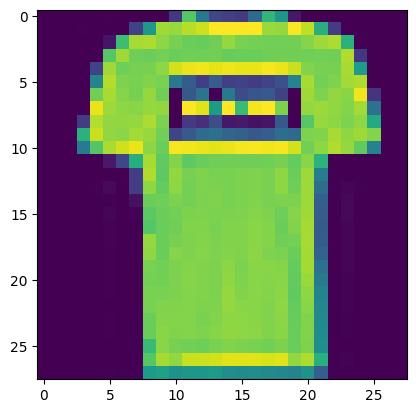

In [ ]:
plt.imshow(train_data[1])
plt.show()

In [ ]:
# Create list so we can index onto our training labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

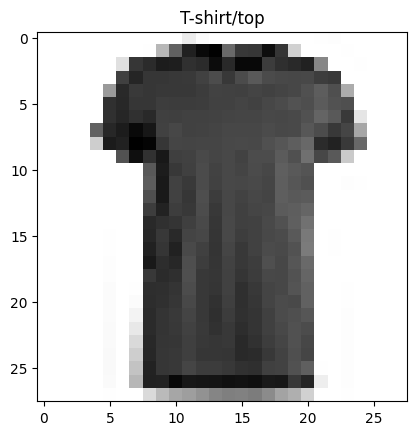

In [ ]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary) # black and white
plt.title(class_names[train_labels[index_of_choice]])

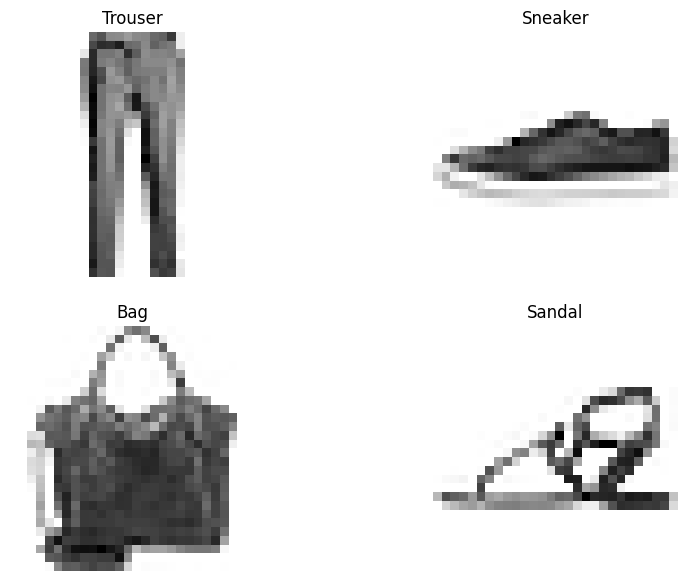

In [ ]:
# Plot multiple random image of fasion NMIST
import random
plt.figure(figsize=(10,7))

for i in range(4):
  # 2*2圖, plt.subplot index從1開始, range index 從0開始 所以需要+1
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building multiclass classification model
* Input shape = 28 x 28(the shape of one image)
* Output shape = 10(one per class of clothing)
* Loss function = CategoricalCrossentropy
* Output layer = Softmax(not Sigmoid)

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
# Normalize the data to range 0~1 , is better way
train_data = train_data / 255
test_data = test_data /255

In [ ]:

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
# Create Model
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=5,restore_best_weights=True)

history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), callbacks=[early_stopping])

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 1.4266 - accuracy: 0.4757 - val_loss: 1.0049 - val_accuracy: 0.5915
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8477 - accuracy: 0.7124 - val_loss: 0.7658 - val_accuracy: 0.7552
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6831 - accuracy: 0.7802 - val_loss: 0.6678 - val_accuracy: 0.7878
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6173 - accuracy: 0.7970 - val_loss: 0.6412 - val_accuracy: 0.7900
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5840 - accuracy: 0.8044 - val_loss: 0.6441 - val_accuracy: 0.7877
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5636 - accuracy: 0.8107 - val_loss: 0.5896 - val_accuracy: 0.8019
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5480 - accuracy: 0.8148 - val_loss: 0.5848 - val_accurac

In [ ]:
# classes: list, default=None, Class names. If None, numeric labels are used.
def plot_confusion_matrix(y_true, y_pred, figsize=(22, 22), classes=None, text_size=10):
    """
    Plots a confusion matrix and its normalized version.

    Parameters:
    y_true: array-like, shape (n_samples,)
        True labels.
    y_pred: array-like, shape (n_samples,)
        Predicted labels.
    figsize: tuple, default=(10, 10)
        Size of the plot.
    classes: list, default=None
        Class names. If None, numeric labels are used.

    Returns:
    None
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix (prevent division by zero)
    if cm.shape[0] > 1:
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm_norm = cm.astype('float') / cm.sum()

    # Number of classes
    n_classes = cm.shape[0]

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)

    # Add a color bar
    fig.colorbar(cax)

    # Set class labels
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    ax.set(title='Confusion Matrix', xlabel='Predicted Label', ylabel='True Label',
           xticks=np.arange(n_classes), yticks=np.arange(n_classes),
           xticklabels=labels, yticklabels=labels)

    # Move the X-axis label to the bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black', size=15)

    # Show the plot
    plt.show()


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make prediction
y_probs = model.predict(test_data)

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.54705640e-06, 1.26501535e-11, 7.34650838e-13, 1.63996274e-24,
        4.04474419e-23, 1.24698423e-01, 1.95915593e-11, 2.26608530e-01,
        1.45086860e-02, 6.34182811e-01],
       [1.75089238e-03, 3.20094841e-05, 7.15655565e-01, 4.62935645e-07,
        3.16565558e-02, 3.40100437e-17, 2.49358475e-01, 3.00866732e-09,
        1.54595531e-03, 2.03408259e-08],
       [3.52077710e-04, 9.93882000e-01, 3.95421317e-04, 4.77923267e-03,
        1.72415632e-04, 4.15104987e-05, 2.73689628e-04, 5.04383825e-05,
        2.43857339e-05, 2.87758667e-05],
       [3.33037606e-04, 9.94478643e-01, 3.39941558e-04, 4.30496549e-03,
        1.40573218e-04, 5.30252000e-05, 2.39547880e-04, 5.52755810e-05,
        2.36650394e-05, 3.13084747e-05],
       [9.96488258e-02, 6.78875204e-03, 2.70737559e-01, 9.99050494e-03,
        6.73198625e-02, 4.60390615e-09, 5.39652348e-01, 3.87335012e-06,
        5.85631747e-03, 1.89112029e-06]], dtype=float32)

In [ ]:
y_probs[0]

array([1.54705640e-06, 1.26501535e-11, 7.34650838e-13, 1.63996274e-24,
       4.04474419e-23, 1.24698423e-01, 1.95915593e-11, 2.26608530e-01,
       1.45086860e-02, 6.34182811e-01], dtype=float32)

In [ ]:
# The largest num is the index(9)
# To find the highest value we can use the argmax() method.
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
# These are index
y_pred = y_probs.argmax(axis=1)

y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test_labels, y_pred)

array([[779,   2,  20,  72,   2,   0, 115,   2,   8,   0],
       [  5, 943,  15,  31,   3,   0,   3,   0,   0,   0],
       [ 30,   3, 753,  14, 104,   0,  87,   2,   7,   0],
       [ 65,  18,  15, 826,  22,   0,  54,   0,   0,   0],
       [  1,   1, 178,  41, 657,   0, 114,   0,   8,   0],
       [  2,   0,   1,   0,   0, 925,   0,  47,   6,  19],
       [151,   2, 141,  57,  89,   0, 538,   0,  22,   0],
       [  0,   0,   0,   0,   0,  49,   0, 912,   0,  39],
       [ 15,   1,   8,   4,   2,  11,  25,   7, 924,   3],
       [  0,   0,   0,   0,   0,  39,   0,  59,   5, 897]])

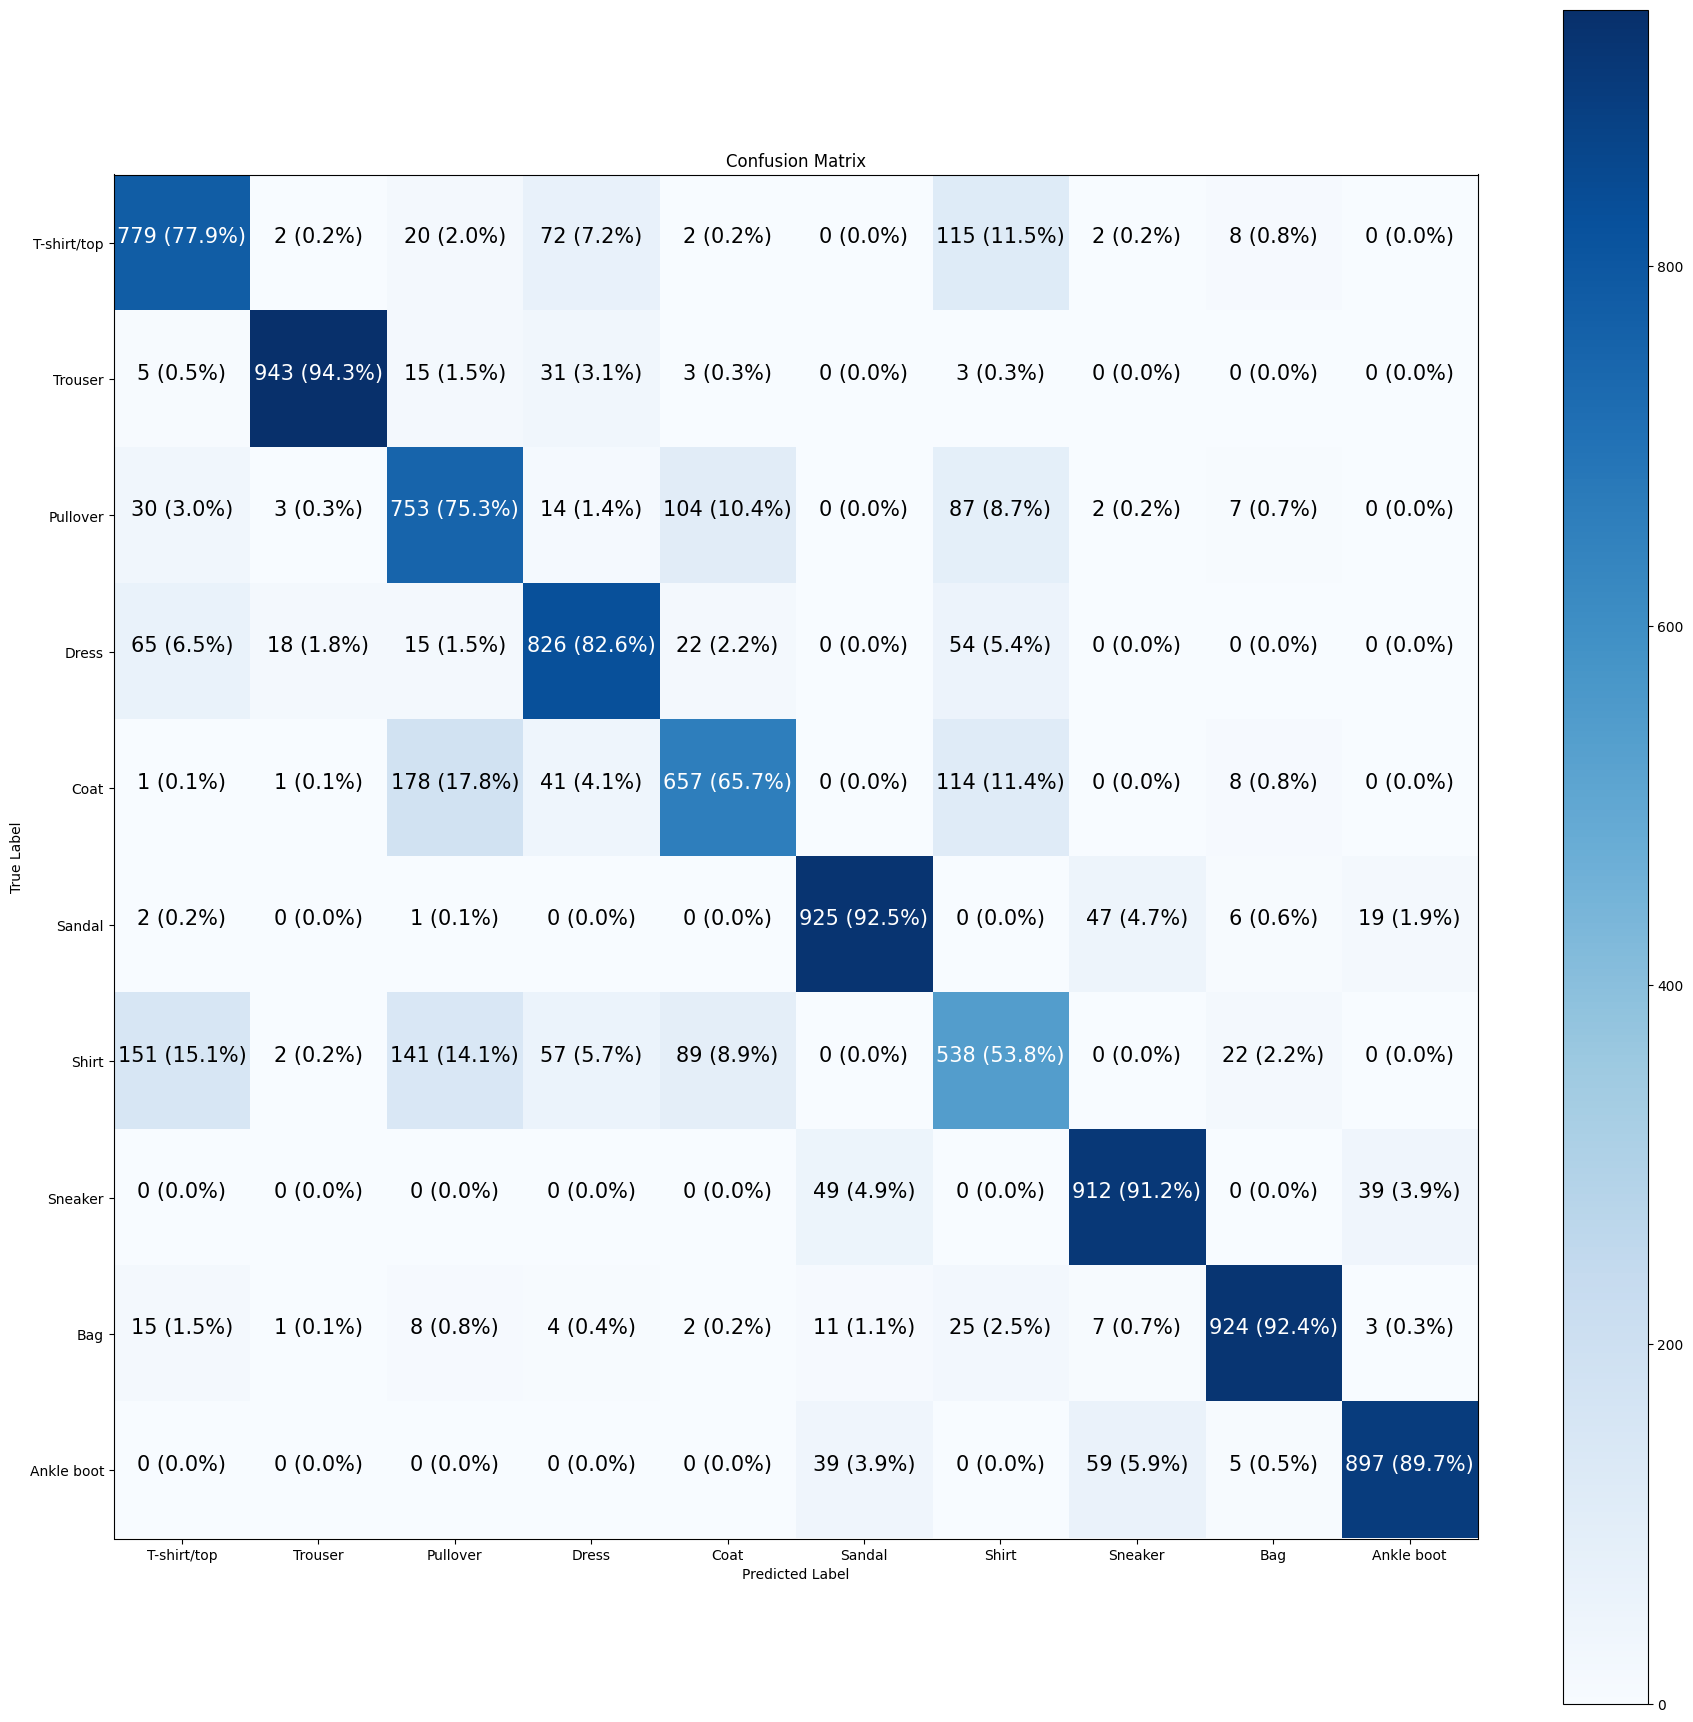

In [ ]:
plot_confusion_matrix(test_labels, y_pred, classes=class_names, text_size=10)

### Create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
# pred_probs.argmax(): This method returns the index of the maximum value in the pred_probs array.
# Suppose pred_probs is the array of predicted probabilities from the model, such as [0.1, 0.2, 0.05, 0.15, 0.5].
# The argmax() method will return the index of the highest probability, which is index 4.

# classes[pred_probs.argmax()]: Use the above index to get the corresponding class name from the classes list.
# Suppose classes is ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
# then classes[4] will return 'Coat'.
# Use this index to get the corresponding class name from the classes list.
# For example, if the true label index is 1, it will return "Trouser".
import random

def plot_random_image(model, images, true_labels, classes):

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]

  # have to reshape to get into right size for model,because the input_shape is (28,28)
  # When input_size(28,28), it actually means (1,28,28), (batch_size, weighth, hieghth), 1 image at time
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/ true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

1/1 [==============================] - 0s 61ms/step


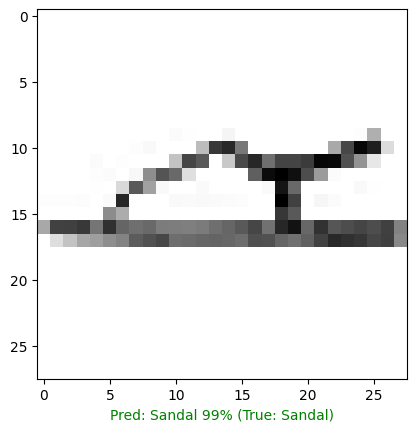

In [ ]:
plot_random_image(model=model, images=test_data, true_labels=test_labels, classes=class_names)

### What patterns is model learning

In [ ]:
# Find the layers of model
model.layers

In [ ]:
# Extract a particular layer
model.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.28967735, -0.07981358, -0.01403751, -0.5200397 ],
        [ 0.84064245,  0.22323908, -0.962335  , -0.4929731 ],
        [ 0.63347995, -0.07163039, -0.693045  , -0.8396463 ],
        ...,
        [ 0.6901761 ,  0.6025329 ,  0.0010727 ,  0.3602433 ],
        [ 0.7228532 ,  0.12407938,  0.21600926,  0.2148423 ],
        [-0.05964911, -0.05248947, -0.09042389, -0.06087526]],
       dtype=float32),
 (784, 4))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([1.6495415 , 2.4130495 , 0.91900057, 1.5981734 ], dtype=float32), (4,))

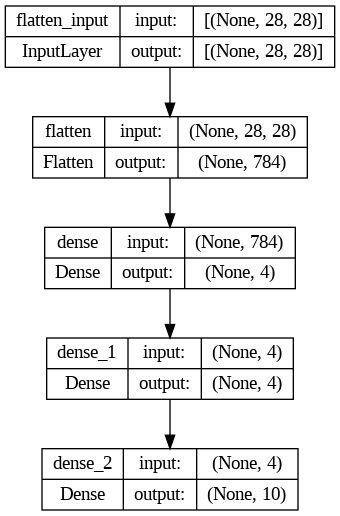

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)